# José Abraham González Navarro - A00369832

# K-means clustering

The notebook aims to study and implement a k-means clustering. The iris dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Activity: work with the iris dataset

1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.


2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.


3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible


4. For the previous cases: 
    - With and without using min max scaling: determine whether the scaling benefits or not
    - Compute and show the elbow plot


5. Draw conclusiones:
    - About the scalling: does it helps or not?
    - About the elbow plot: does the K agree with the real number of clusters?
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?

# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [2]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [3]:
dataset.shape

(150, 5)

2. Drop rows with any missing values

In [4]:
dataset.dropna()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


3. Encoding the class label categorical column: from string to num


In [5]:
# Encoding the categorical column

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

4. Discard columns that won't be used


In [6]:
#le añadimos un valor numérico a la clase de plantas para un manejo más fácil de los datos
dataset["ClassNum"] = dataset.Class.replace({"Iris-setosa": 0, "Iris-virginica": 2, "Iris-versicolor": 1}) 

#hacemos una copia de los datos para el primer análisis
ds1 = dataset.copy()

#quitamos las columas de class, sepal length y sepal width
ds1.drop(["Class", "SepalLength", "SepalWidth"], axis='columns', inplace=True)

ds1

,PetalLength,PetalWidth,ClassNum
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


5. Scatter plot of the data

<function matplotlib.pyplot.show(close=None, block=None)>

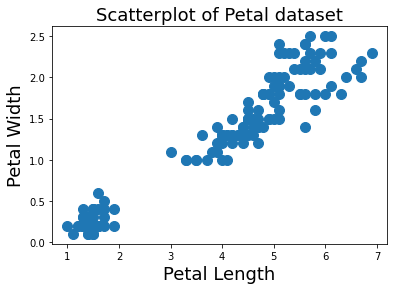

In [7]:
plt.scatter(ds1.PetalLength, ds1.PetalWidth, s=100)
plt.title('Scatterplot of Petal dataset', fontsize=18)
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

plt.show

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

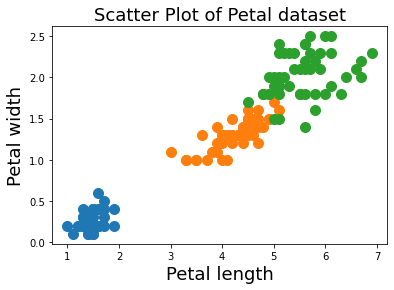

In [8]:
df1 = ds1[ds1.ClassNum==0]
df2 = ds1[ds1.ClassNum==1]
df3 = ds1[ds1.ClassNum==2]

plt.scatter(df1.PetalLength, df1.PetalWidth, s=100)
plt.scatter(df2.PetalLength, df2.PetalWidth, s = 100)
plt.scatter(df3.PetalLength, df3.PetalWidth, s= 100)

plt.title("Scatter Plot of Petal dataset", fontsize = 18)
plt.xlabel('Petal length', fontsize=18)
plt.ylabel('Petal width', fontsize=18)

plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [9]:
from sklearn.cluster import KMeans
k = 3
km = KMeans(n_clusters=k)

clusters = km.fit_predict(ds1[['PetalLength', 'PetalWidth']])
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
ds1["cluster1"] = clusters

ds1

,PetalLength,PetalWidth,ClassNum,cluster1
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0
...,...,...,...,...
145,5.2,2.3,2,1
146,5.0,1.9,2,1
147,5.2,2.0,2,1
148,5.4,2.3,2,1


In [11]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [12]:
ds1.cluster1.unique()

array([0, 2, 1])

In [13]:
km.inertia_

31.371358974358966

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

C:\Users\ABRAHA~1\AppData\Local\Temp/ipykernel_21196/3263986987.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.PetalLength, df1.PetalWidth, Label='Estimated Petal Group 1')
C:\Users\ABRAHA~1\AppData\Local\Temp/ipykernel_21196/3263986987.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.PetalLength, df2.PetalWidth, Label='Estimated Petal Group 2')
C:\Users\ABRAHA~1\AppData\Local\Temp/ipykernel_21196/3263986987.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.PetalLength, df3.PetalWidth, Label='Estimated Petal Group 3')


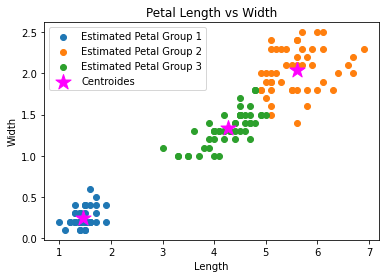

In [14]:
df1 = ds1[ds1.cluster1==0]
df2 = ds1[ds1.cluster1==1]
df3 = ds1[ds1.cluster1==2]

plt.scatter(df1.PetalLength, df1.PetalWidth, Label='Estimated Petal Group 1')
plt.scatter(df2.PetalLength, df2.PetalWidth, Label='Estimated Petal Group 2')
plt.scatter(df3.PetalLength, df3.PetalWidth, Label='Estimated Petal Group 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal Length vs Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [15]:
sse = []
k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit_predict(ds1[['PetalLength', 'PetalWidth']])
    sse.append(km.inertia_)

Text(0, 0.5, 'SSE')

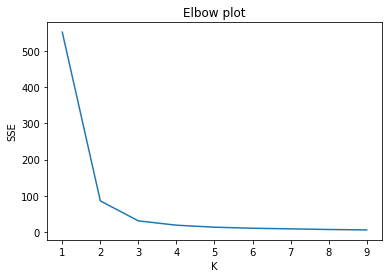

In [16]:
plt.plot(k_rng, sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')



<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(ds1[['PetalLength']])
ds1['PetalLength'] = scaler.transform(ds1[['PetalLength']])

scaler.fit(ds1[['PetalWidth']])
ds1['PetalWidth'] = scaler.transform(ds1[['PetalWidth']])

ds1

,PetalLength,PetalWidth,ClassNum,cluster1
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,2,1
146,0.677966,0.750000,2,1
147,0.711864,0.791667,2,1
148,0.745763,0.916667,2,1


In [18]:
ds1.describe()

,PetalLength,PetalWidth,ClassNum,cluster1
count,150.000000,150.000000,150.000000,150.000000
mean,0.467458,0.458056,1.000000,1.013333
std,0.299203,0.317599,0.819232,0.827276
min,0.000000,0.000000,0.000000,0.000000
25%,0.101695,0.083333,0.000000,0.000000
50%,0.567797,0.500000,1.000000,1.000000
75%,0.694915,0.708333,2.000000,2.000000
max,1.000000,1.000000,2.000000,2.000000


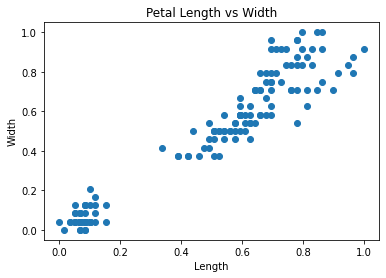

In [19]:
plt.scatter(ds1.PetalLength,ds1.PetalWidth)
plt.title('Petal Length vs Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

In [20]:
# Initialize model and define number of clusters
k=3

km = KMeans(n_clusters=k)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(ds1[['PetalLength','PetalWidth']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
ds1["cluster2"] = yp

yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

C:\Users\ABRAHA~1\AppData\Local\Temp/ipykernel_21196/1641761183.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.PetalLength, df1.PetalWidth, Label='Estimated Petal Group 1')
C:\Users\ABRAHA~1\AppData\Local\Temp/ipykernel_21196/1641761183.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.PetalLength, df2.PetalWidth, Label='Estimated Petal Group 2')
C:\Users\ABRAHA~1\AppData\Local\Temp/ipykernel_21196/1641761183.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.PetalLength, df3.PetalWidth, Label='Estimated Petal Group 3')


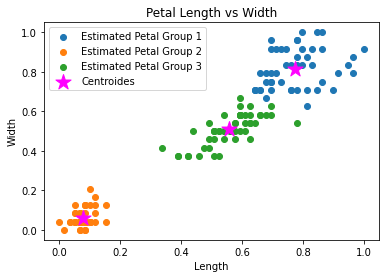

In [22]:
df1 = ds1[ds1.cluster2==0]
df2 = ds1[ds1.cluster2==1]
df3 = ds1[ds1.cluster2==2]

plt.scatter(df1.PetalLength, df1.PetalWidth, Label='Estimated Petal Group 1')
plt.scatter(df2.PetalLength, df2.PetalWidth, Label='Estimated Petal Group 2')
plt.scatter(df3.PetalLength, df3.PetalWidth, Label='Estimated Petal Group 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal Length vs Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

# Comparison of matches with real clusters
Comparison without scalling

In [23]:
# Comparison without scalling
# Encoding to match class with the clusters generated
index = ds1.cluster1.unique()
dataset = ds1.replace({"ClassNum":  {index[0]:0, index[1]:1, index[2]:2} })


# Comparision to keep only the ones that match
dataset[dataset.ClassNum==dataset.cluster1].shape

(144, 5)

Comparison with scalling

In [24]:
# Comparison without scalling
# Encoding to match class with the clusters generated
index = ds1.cluster2.unique()
dataset2 = ds1.replace({"ClassNum":  {index[0]:0, index[1]:1, index[2]:2} })


# Comparision to keep only the ones that match
dataset2[dataset2.ClassNum==dataset2.cluster2].shape

(2, 5)

# Conclusiones


En el caso del escalamiento tuvo distintos resultados. En el primer caso de los pétalos no parece que ayudó mucho porque tuvimos resultados muy similares a cuando no usamos escala. En el caso de los pétalos fue distinto porque a comparación del set original obtuvimos más coincidencias. En el último en donde incluimos todas las variables del set de datos obtuvimos mejores resultados sin escalamiento.

En general los elbow plot están de acuerdo en que 3 es el número de clusters adecuado para analizar el dataset de iris.

En general podemos decir que con los petalos y sepalos separados pudimos llegar a conclusiones más solidas y a un análisis más fácil. Esto se debe a que en estos podíamos usar scatter plots para ver retroalimentación visual de nuestro trabajo. Por eso a comparación de incluir todas las variables, es mejor incluir dos variables para observar visualmente los resultados.